In [1]:
import json
from matplotlib import pyplot as plt
from utils.plotting_tools import plot_cs_vqe_convergence, plot_cs_vqe_convergence_alt

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


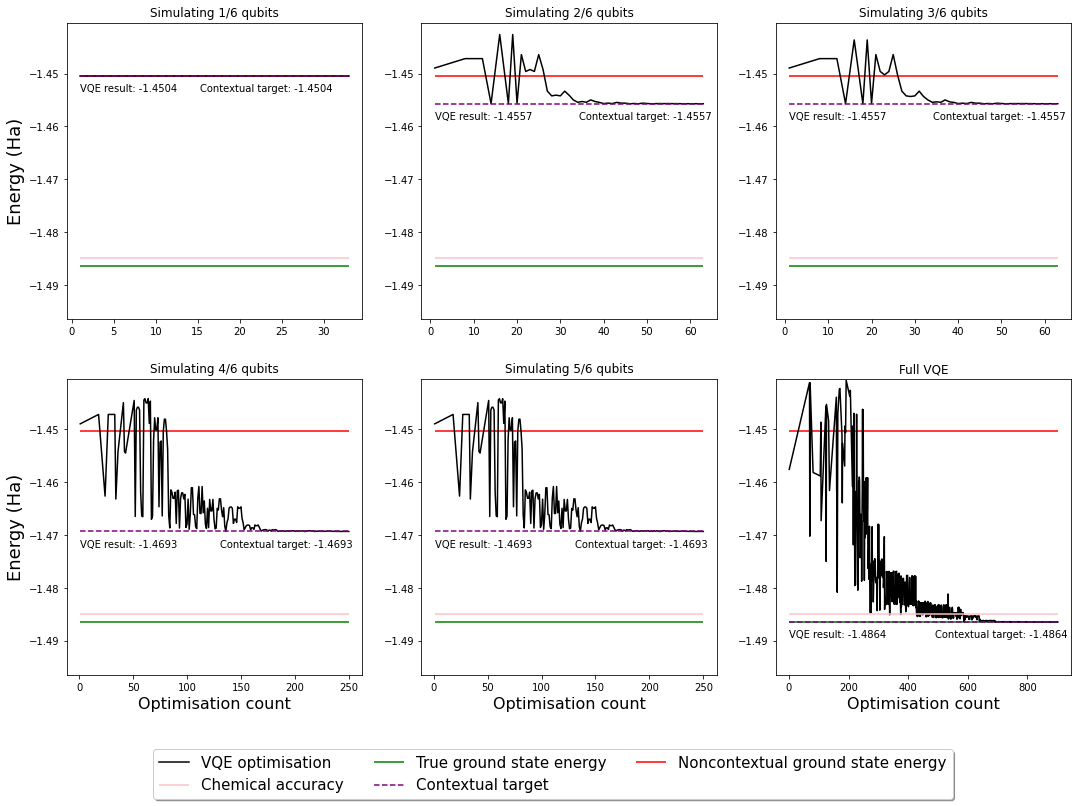

In [2]:
file = 'H3_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: H3 STO-3G singlet, reduced UCCSD Ansatz')
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

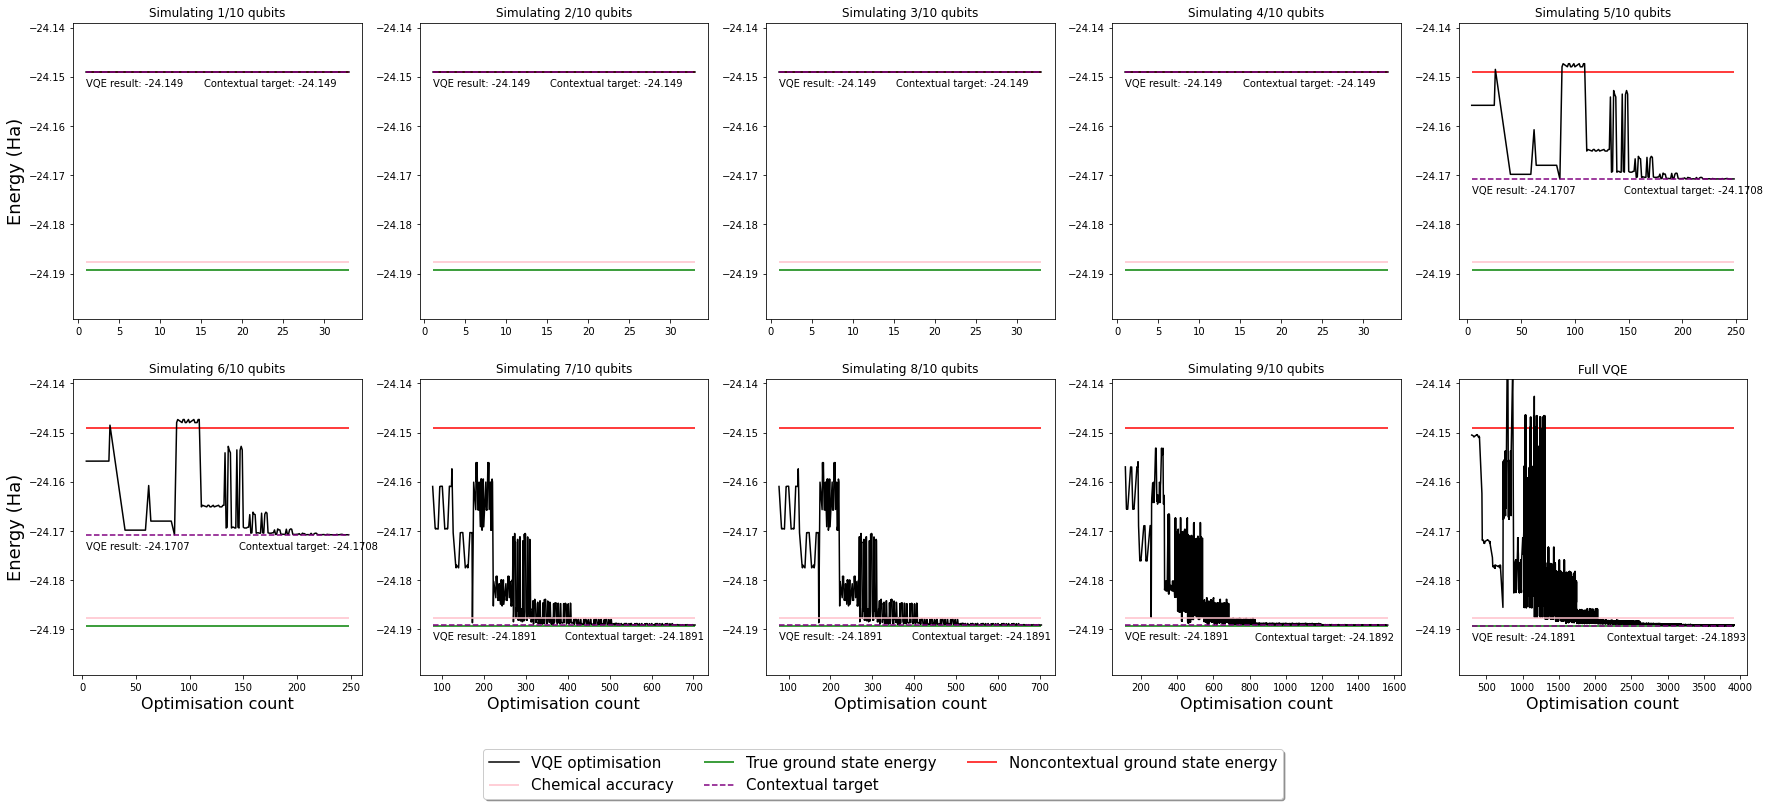

In [3]:
file='B+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: B+ STO-3G singlet, reduced UCCSD Ansatz')
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

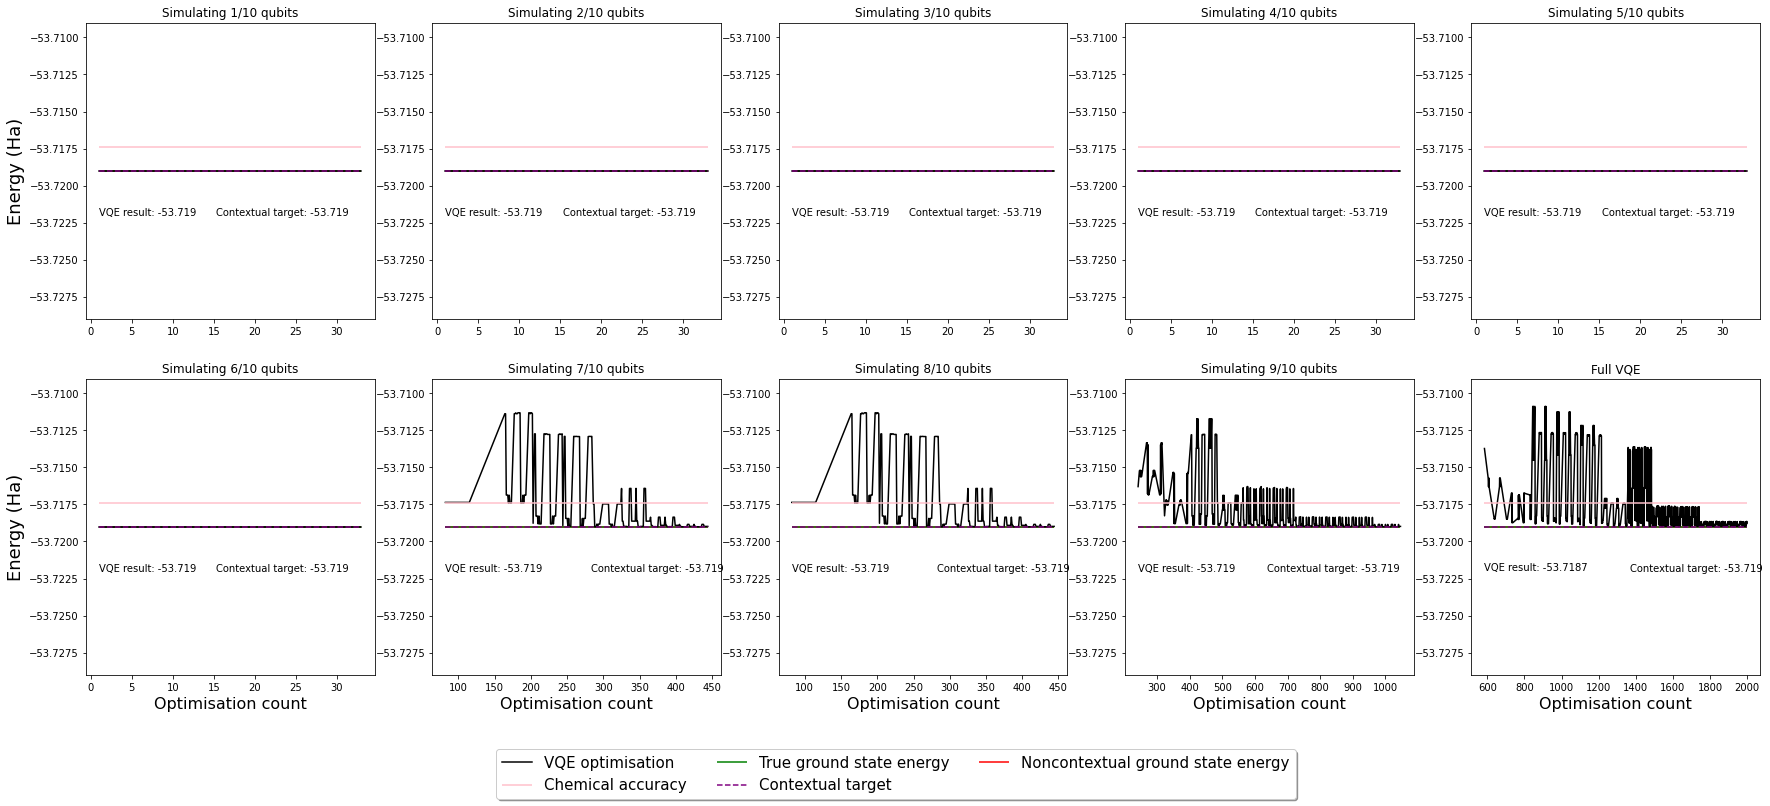

In [4]:
file='N+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: N+ STO-3G singlet, reduced UCCSD Ansatz')
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

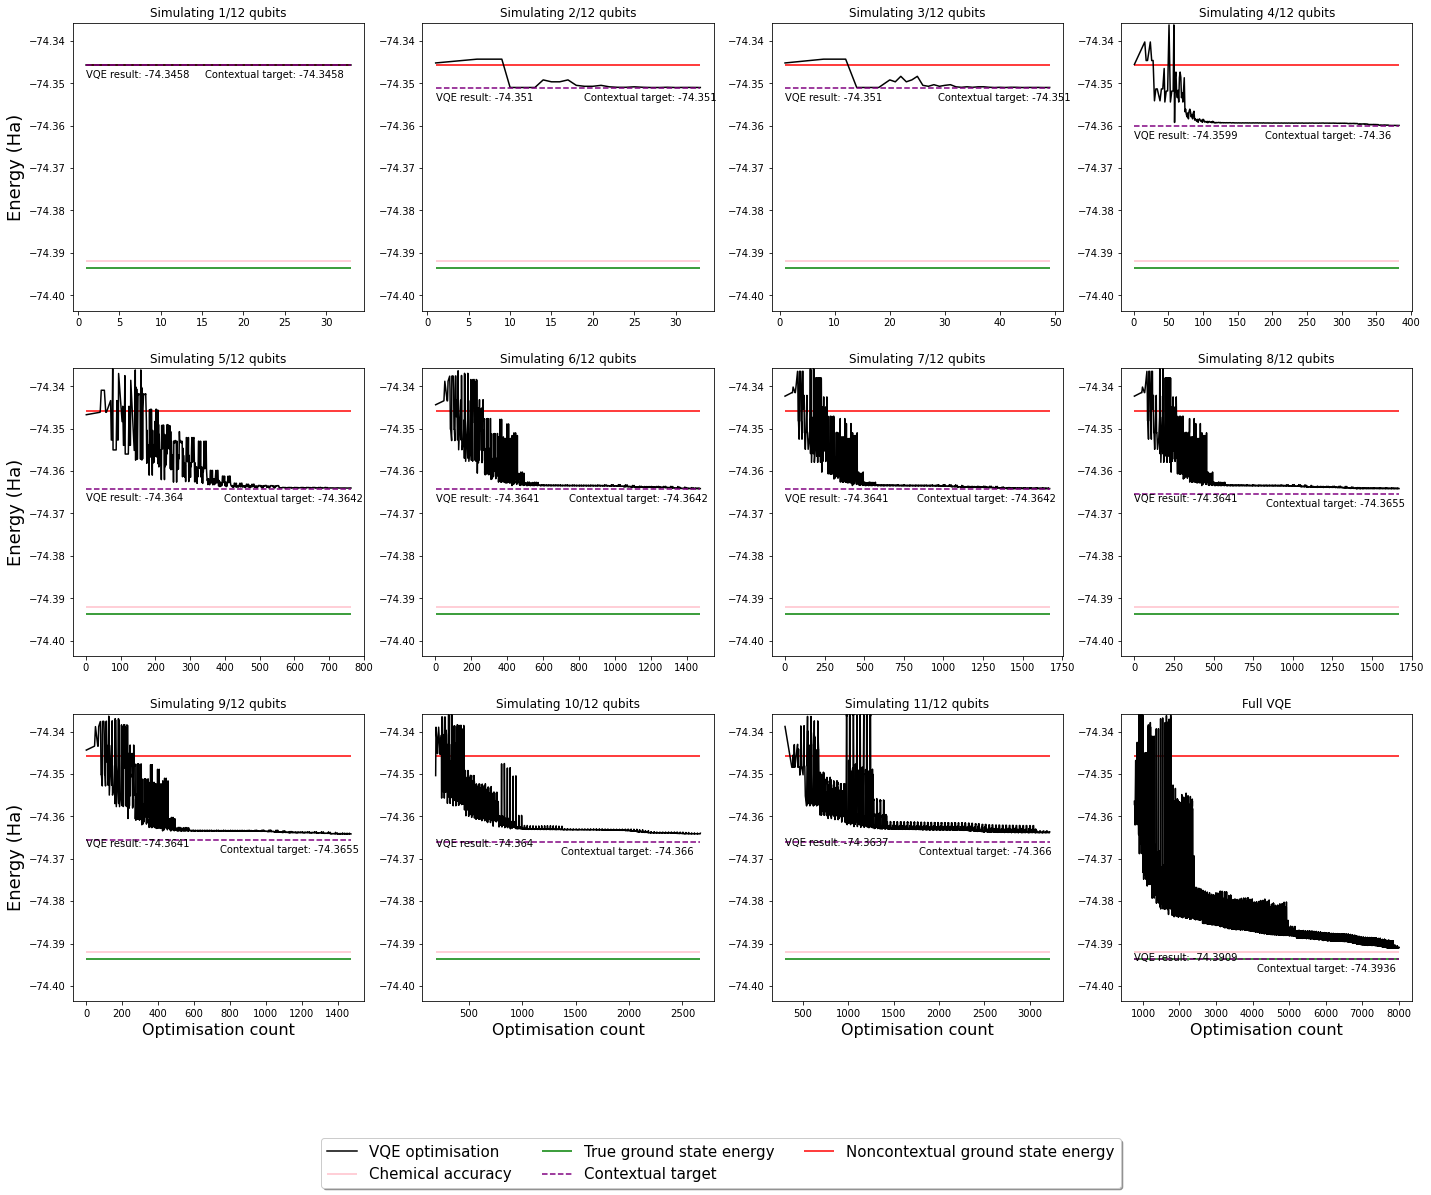

In [11]:
file='OH+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: OH+ STO-3G singlet, reduced UCCSD Ansatz')
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

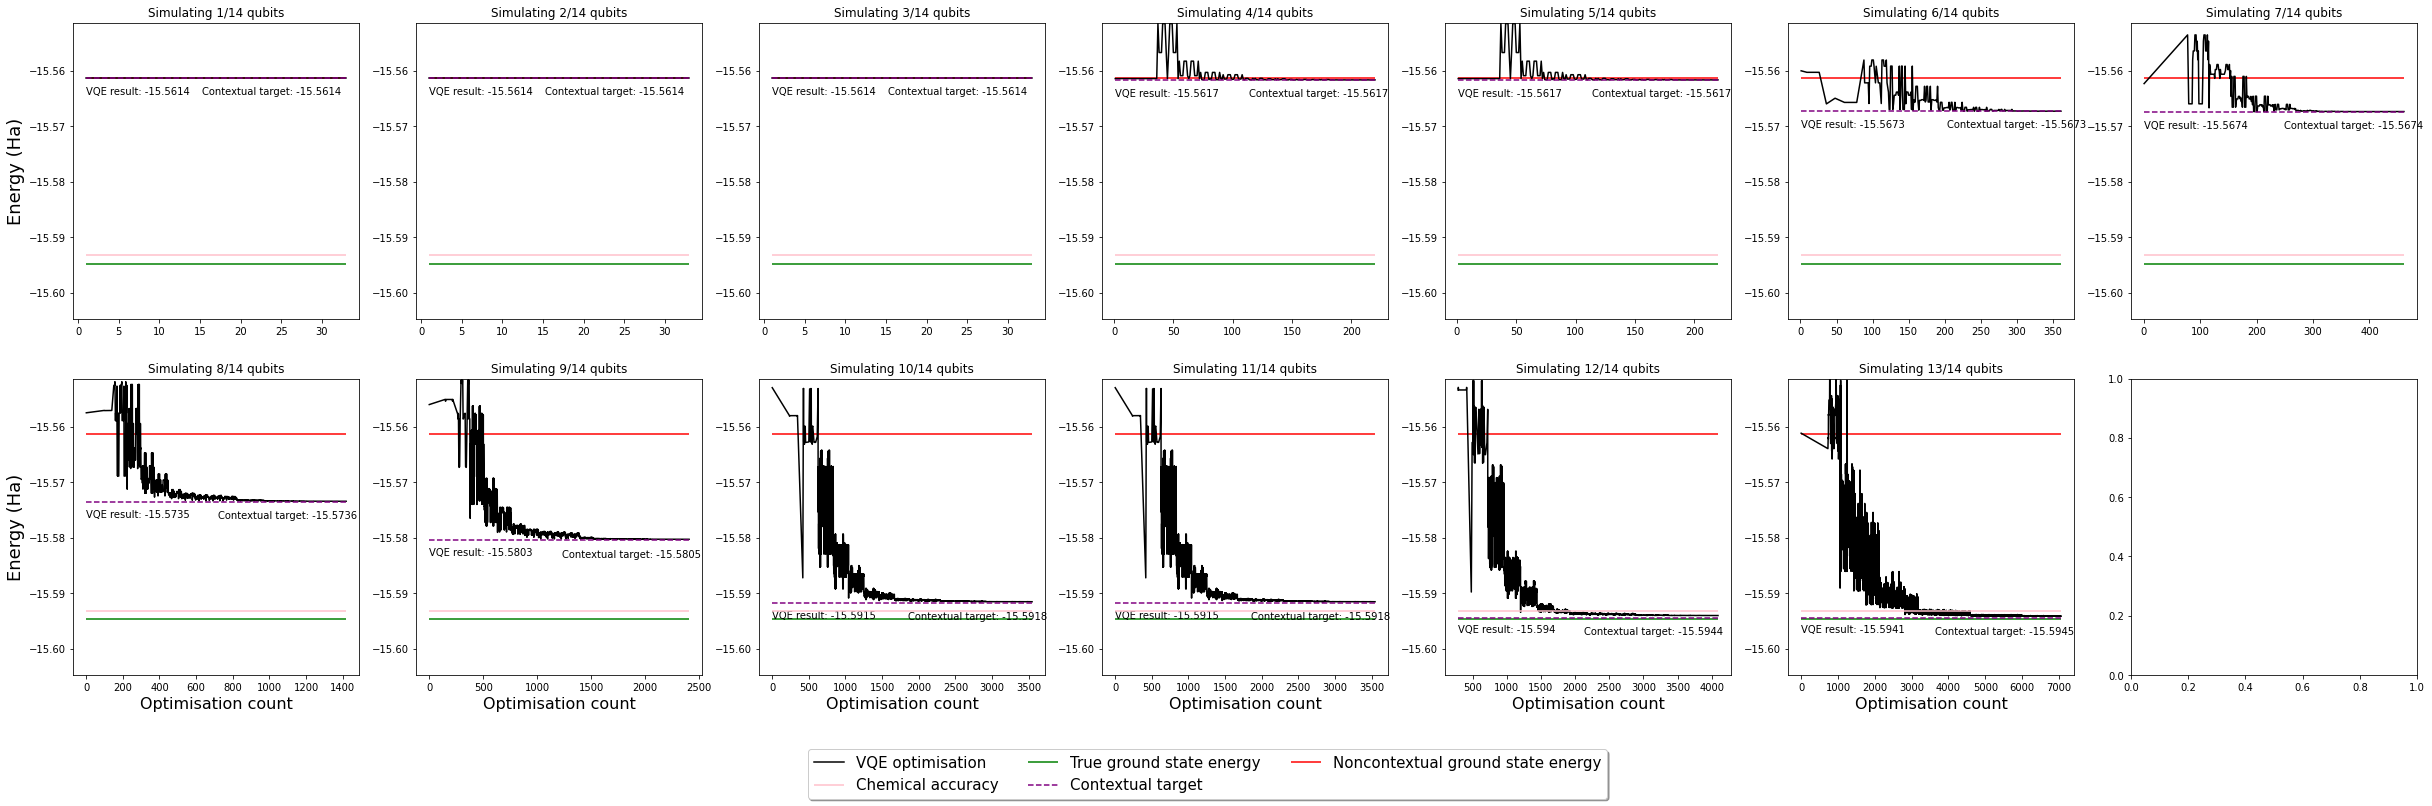

In [61]:
file='BeH2_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: BeH2 STO-3G singlet, reduced UCCSD Ansatz')
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

In [62]:
mol_data_sets = ["H3_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "B+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "N+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "OH+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "BeH2_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "H2_3-21G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "HeH+_3-21G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "H2O_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz"]

In [63]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

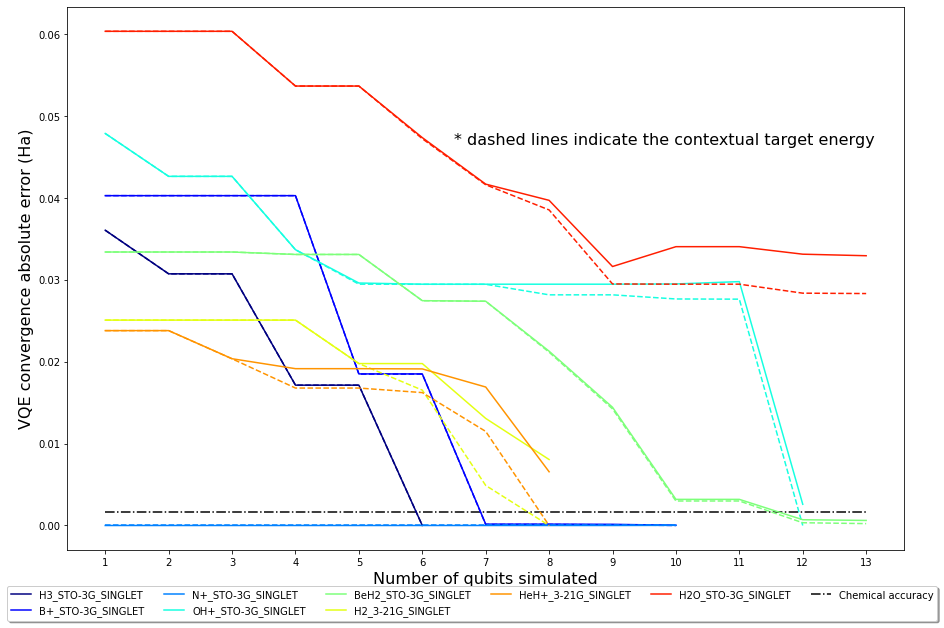

In [65]:
mol_data = {}

fig, axis = plt.subplots(figsize=(15, 10))


for index, file in enumerate(mol_data_sets):
    with open('data/final/'+file+'.json', 'r') as json_file:
        cs_vqe_data = json.load(json_file)
    name_end = find_nth(file, '_', 3)
    speciesname = file[:name_end]
    if speciesname in ['BeH2_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET']:
        qubit_nums = list(range(1, cs_vqe_data['num_qubits']))
    else:
        qubit_nums = list(range(1, cs_vqe_data['num_qubits']+1))
    result_error = []
    target_error = []
    for g in cs_vqe_data['grid_pos']:
        run_index = '('+str(g)[1:-1]+')'
        result_error.append(cs_vqe_data[run_index]['result'] - cs_vqe_data['true_gs'])
        target_error.append(cs_vqe_data[run_index]['target'] - cs_vqe_data['true_gs'])
        
    c = plt.cm.jet(index/len(mol_data_sets))
    axis.plot(qubit_nums, result_error, label=speciesname, color=c)
    axis.plot(qubit_nums, target_error, color=c, ls='--')
    #mol_data[speciesname] = {'qubit_nums':qubit_nums,
    #                         'errors':errors}

axis.set_xticks(list(range(1, 14)))
axis.hlines(0.0016, 1, 13, label='Chemical accuracy', color='black', ls='-.')
axis.set_xlabel('Number of qubits simulated', fontsize=16)
axis.set_ylabel('VQE convergence absolute error (Ha)', fontsize=16)
axis.text(6.5, 0.0465, '* dashed lines indicate the contextual target energy', fontsize=16)

fig.legend(loc='lower center',bbox_to_anchor=(0.5, 0.02),
          fancybox=True, shadow=True, ncol=6)